In [12]:
# Uncomment for development/debugging
%matplotlib inline


# Uncomment to plot nice-looking final figures
"""
import matplotlib as mpl

mpl.style.use('classic')
mpl.use("pgf")
pgf_with_custom_preamble = {
    "font.family": "serif", # use serif/main font for text elements
    "text.usetex": True,    # use inline math for ticks
    "pgf.rcfonts": False,   # don't setup fonts from rc parameters
    "pgf.preamble": [
         "\\usepackage{unicode-math}",  # unicode math setup
         "\\setmainfont{Doulos SIL}" # serif font via preamble
         ]
}
mpl.rcParams.update(pgf_with_custom_preamble)
"""

import numpy as np
import pandas
import seaborn as sns

In [38]:
fname = './results/data.csv'
df = pandas.read_csv(fname)
del df['Unnamed: 0']

In [39]:
df['p'].iloc[0]+1

1.01

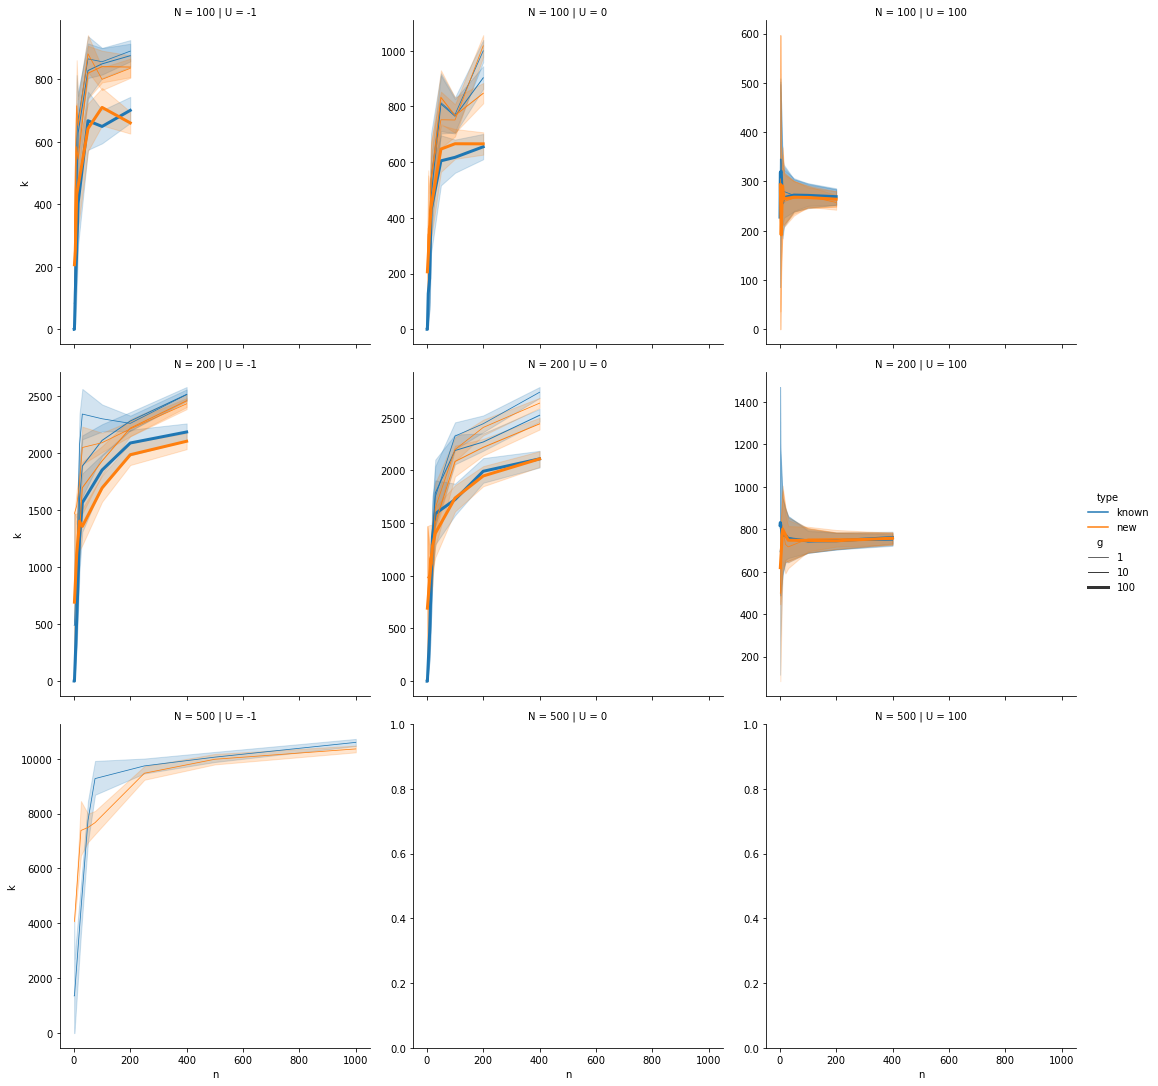

In [45]:
g = sns.relplot(x='n', y='k', hue='type', col = 'U', row='N', size = 'g', data=df, kind='line', facet_kws={'sharey': False, 'sharex': True})
#g = sns.relplot(x='', y='error', hue='model', col='test set',
#                data=mp_V, hue_order=['MFCC', 'BNF'], kind="line")
#g.axes[0,0].set_yscale('log')

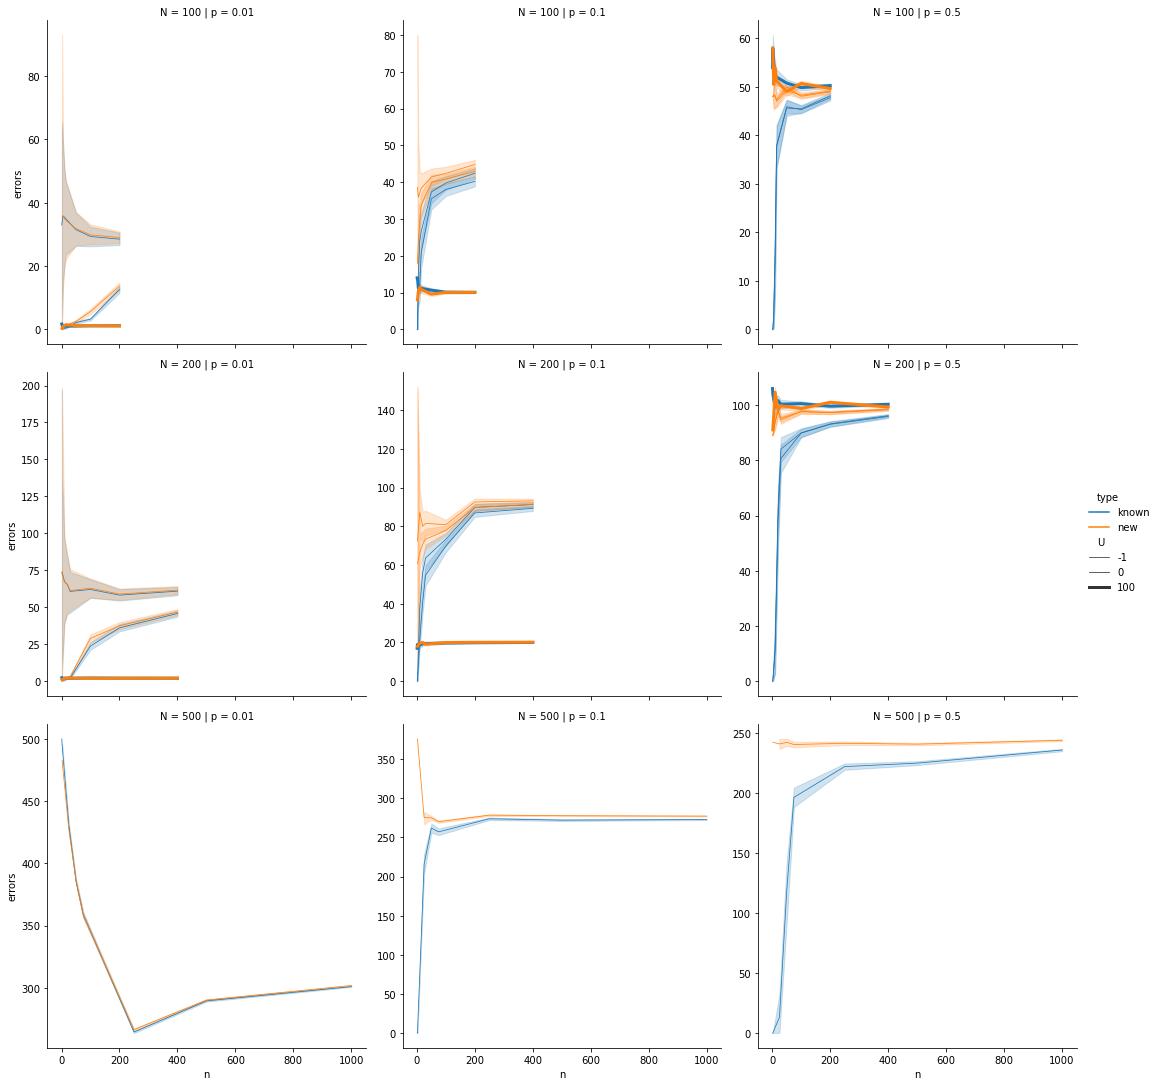

In [43]:
g = sns.relplot(x='n', y='errors', hue='type', col='p', row='N', size='U', data=df, kind='line', facet_kws={'sharey': False, 'sharex': True})